In [2]:
setwd("C:\\Users\\xiao\\Documents\\GitHub\\DST-Assessment-02\\Data")
conndata<-read.table("5_percent_data.csv.gz", sep=",", header=TRUE, na.strings=c("","NA"))

In [3]:
for(i in c(3,5,8,9,10,12,14:17)) conndata[,i]=as.numeric(conndata[,i])
for(i in c(2,4,6,11,13)) conndata[,i]=as.factor(conndata[,i])


 Variables sorted by number of missings: 
   Variable     Count
    service 0.9704737
   duration 0.8281686
 orig_bytes 0.8281686
 resp_bytes 0.8281686


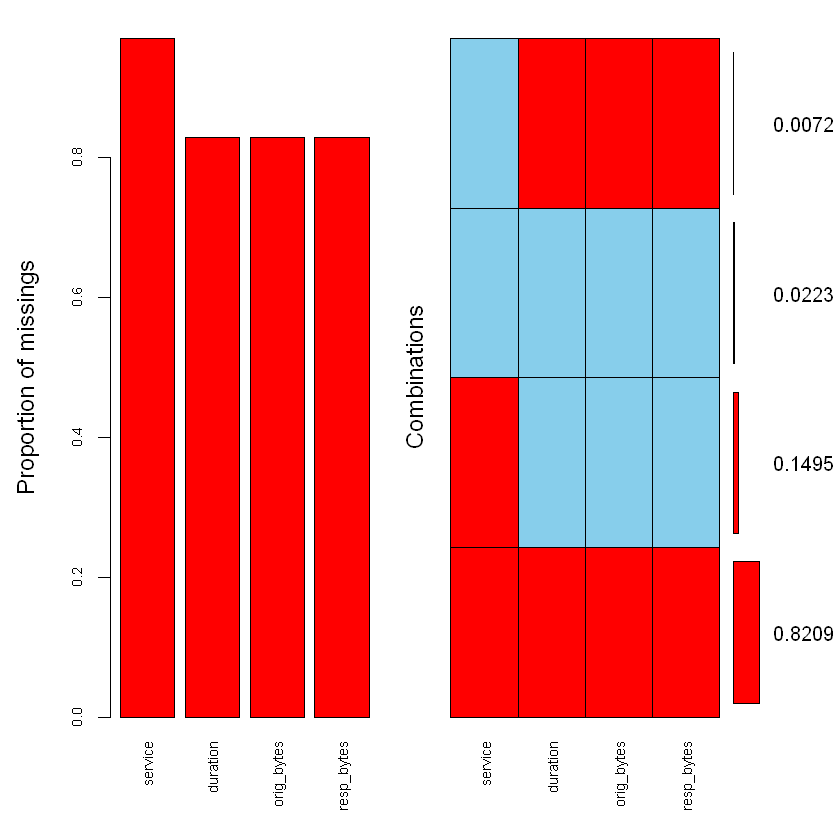

In [30]:
library("VIM")
mice_plot <- aggr(conndata[,which(names(conndata) %in% c("service","duration","orig_bytes","resp_bytes"))],
                  numbers=TRUE, sortVars=TRUE,cex.axis=.7,gap=3)

In [16]:
sum(is.na(conndata$duration))/nrow(conndata)

[1] 0.8281686

In [19]:
data_complete<-conndata[-which(is.na(conndata$duration)),]

In [20]:
nrow(data_complete)

[1] 194980

In [35]:
data_missing <- data_complete
set.seed(10)
data_missing[sample(1:nrow(data_missing),nrow(data_missing)*0.8281686),"duration"] <- NA

In [36]:
data_missing[is.na(data_missing$duration),"orig_bytes"] <- NA
data_missing[is.na(data_missing$duration),"resp_bytes"] <- NA

In [37]:
head(data_missing)

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1331915797,192.168.202.102,2633,192.168.23.202,80,tcp,http,NA,NA,NA,RSTO,0,ShADadfR,8,813,9,8505
13,1331921224,192.168.202.102,4094,192.168.24.101,80,tcp,NA,0.01,7085,172,RSTO,0,ShADadfR,10,7497,9,544
18,1331903910,192.168.202.110,16066,192.168.27.152,12486,tcp,NA,NA,NA,NA,REJ,0,Sr,1,48,1,40
27,1331988939,192.168.204.45,42997,192.168.23.1,28745,tcp,NA,NA,NA,NA,REJ,0,Sr,1,60,1,40
29,1331918792,192.168.202.110,38566,192.168.229.252,32754,tcp,NA,NA,NA,NA,REJ,0,Sr,1,48,1,40
31,1331901863,192.168.202.79,63805,192.168.229.252,45078,tcp,NA,NA,NA,NA,REJ,0,Sr,1,44,1,40



 Variables sorted by number of missings: 
   Variable     Count
    service 0.8701969
   duration 0.8281670
 orig_bytes 0.8281670
 resp_bytes 0.8281670


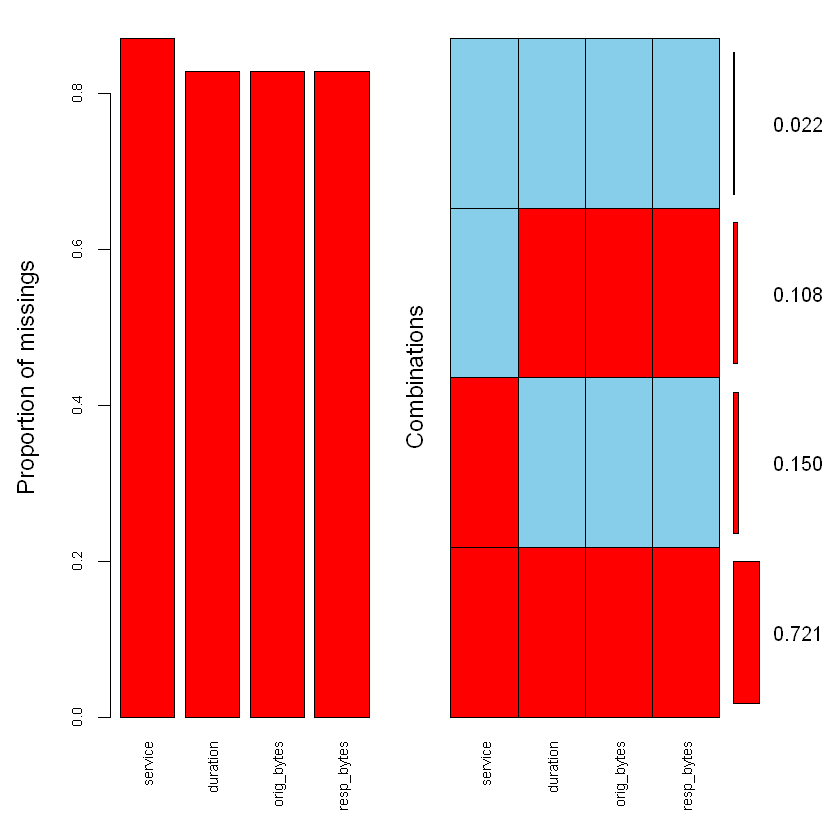

In [38]:
mice_plot <- aggr(data_missing[,which(names(data_missing) %in% c("service","duration","orig_bytes","resp_bytes"))],
                  numbers=TRUE, sortVars=TRUE,cex.axis=.7,gap=3)

We can see that The new test dataset has almost the same proportions of missing values for three numeric variables as the original dataset, we can think that the distribution of the two datasets is approximate, so that the model which applies to test data also applies to actual data.

In [44]:
library(crunch)
write.csv.gz(data_missing,"C:\\Users\\xiao\\Documents\\GitHub\\DST-Assessment-02\\Data\\test_missing1.csv.gz",row.names=FALSE)

In [45]:
write.csv.gz(data_complete,"C:\\Users\\xiao\\Documents\\GitHub\\DST-Assessment-02\\Data\\test_complete1.csv.gz",row.names=FALSE)